In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("data_assignment5.csv")

### Question 1
Plot the total percentages of all people of at least bachelor's degree with a line chart over
years. Use different colors to show the attribute “min degree”. (the degree level of
associate’s is lower than bachelor’s)

In [3]:
data

,Year,Sex,Min degree,Total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
0,1920,A,high school,---,22.0,6.3,---,---,---,---,---
1,1940,A,high school,38.1,41.2,12.3,---,---,---,---,---
2,1950,A,high school,52.8,56.3,23.6,---,---,---,---,---
3,1960,A,high school,60.7,63.7,38.6,---,---,---,---,---
4,1970,A,high school,75.4,77.8,58.4,---,---,---,---,---
...,...,...,...,...,...,...,...,...,...,...,...
209,2014,F,master's,9.3,11.1,5.0,3.6,20.8,---,---,7.5
210,2015,F,master's,10.4,12.0,7.2,4.1,23.2,---,---,10.2
211,2016,F,master's,11.2,12.3,6.3,6.3,28.8,---,---,8.2
212,2017,F,master's,10.5,11.8,6.8,5.0,25.8,---,---,5.4


In [4]:
data = data.replace("---", 0)

In [5]:
data["Total"] = data.Total.astype(float)

In [6]:
df1 = data.groupby(["Year","Min degree"]).agg({'Total': 'sum'})
# Change: groupby and divide by sum
df1_1 = df1.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df1_1 = df1_1.reset_index().fillna(0)

In [7]:
df1_final = df1_1.loc[(df1_1["Min degree"] == "bachelor's") | (df1_1["Min degree"] == "master's")]
df1_final

,Year,Min degree,Total
0,1920,bachelor's,0.000000
2,1940,bachelor's,13.409091
4,1950,bachelor's,12.727273
6,1960,bachelor's,15.341702
8,1970,bachelor's,17.864924
10,1980,bachelor's,20.846201
12,1990,bachelor's,21.328029
15,1995,bachelor's,16.569767
17,1995,master's,3.018784
19,2000,bachelor's,18.119409


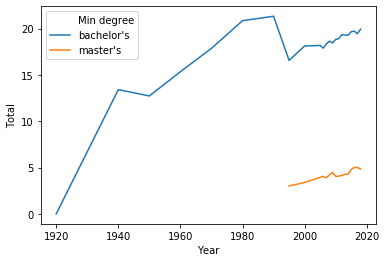

In [8]:
sns.lineplot(x="Year", y="Total",hue="Min degree",data=df1_final)

### Question 2
Plot the total percentages of women, men, and total people with a minimum education of
high school degrees with a bar chart in the year 2009. Do you think the bar chart is an
effective data visualization for this question? Explain in 1-2 sentences why or why not.

In [9]:
y2009 = data.loc[data["Year"] == 2009]
y2009

,Year,Sex,Min degree,Total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
13,2009,A,high school,88.6,94.6,88.9,68.9,95.8,91.6,81.1,88.5
29,2009,A,associate's,39.3,47.1,27.8,18.4,66.7,20.9,20.8,35.6
52,2009,A,bachelor's,30.6,37.2,18.9,12.2,60.3,12.5,15.9,29.7
68,2009,A,master's,7.4,8.9,4.2,1.9,22.9,0,0,6.5
86,2009,M,high school,87.5,94.4,88.8,66.2,96.2,98.2,77.5,92.0
102,2009,M,associate's,34.5,41.8,21.9,15.9,66.6,17.4,17.1,31.7
120,2009,M,bachelor's,26.6,32.6,14.8,11.0,59.2,0,15.2,24.6
136,2009,M,master's,6.1,7.4,3.2,1.2,22.0,0,0,5.0
154,2009,F,high school,89.8,94.8,89.0,72.5,95.3,86.2,83.4,84.8
170,2009,F,associate's,44.4,52.5,33.0,21.7,66.8,23.6,23.3,39.8


In [10]:
y2009_2 = y2009.groupby(["Sex","Min degree"]).agg({"Total": "sum"}).reset_index()
y2009_2

,Sex,Min degree,Total
0,A,associate's,39.3
1,A,bachelor's,30.6
2,A,high school,88.6
3,A,master's,7.4
4,F,associate's,44.4
5,F,bachelor's,34.8
6,F,high school,89.8
7,F,master's,8.8
8,M,associate's,34.5
9,M,bachelor's,26.6


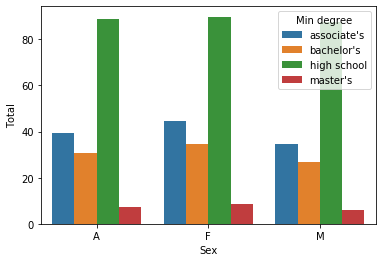

In [11]:
sns.barplot(x="Sex", y="Total", hue="Min degree",data=y2009_2)

##### Explanation
Bar chart is not effective to display this set of data if compared with plotting using a pie graph. For data displaying percentage, a pie chart would prove to be more superior in data visualizing. As a pie chart is known to be a circle of a 100%. With a full circle, readers are able to tell more clearly the percentage of each attribute of the dataset if compared side by side to a bar graph as above.

### Question 3
Plot the results of how the percent of Hispanic individuals with degrees has changed
between 1990 and 2010 (inclusive) for high school and bachelor's degrees with a chart of
your choice. Explain in a few sentences why you chose this type of plot over others.

In [12]:
hs = data[["Year","Hispanic","Total","Min degree"]]
# .drop("Sex",axis = 1)
# y = y.groupby(["Year","Hispanic","Min degree"]).sum().reset_index()
# y
hs = hs.astype({"Hispanic": "float64"})

In [13]:
hs_final = hs.loc[((hs["Year"]>=1990) & (hs["Year"]<=2010)) &
    ((hs["Min degree"] == "bachelor's") | (hs["Min degree"] == "high school"))]
hs_final = hs_final.groupby(["Year","Min degree"]).sum().reset_index()
hs_final

,Year,Min degree,Hispanic,Total
0,1990,bachelor's,24.5,69.7
1,1990,high school,174.7,257.1
2,1995,bachelor's,26.8,74.1
3,1995,high school,171.5,260.5
4,2000,bachelor's,29.0,87.1
5,2000,high school,188.4,264.2
6,2005,bachelor's,33.8,86.5
7,2005,high school,189.9,258.6
8,2006,bachelor's,29.2,85.3
9,2006,high school,190.3,259.3


In [14]:
hs_final.loc[:]["Hispanic"] = (hs_final[:]["Hispanic"]/hs_final[:]["Total"])*100
hs_final

,Year,Min degree,Hispanic,Total
0,1990,bachelor's,35.150646,69.7
1,1990,high school,67.950214,257.1
2,1995,bachelor's,36.167341,74.1
3,1995,high school,65.834933,260.5
4,2000,bachelor's,33.295063,87.1
5,2000,high school,71.309614,264.2
6,2005,bachelor's,39.075145,86.5
7,2005,high school,73.433875,258.6
8,2006,bachelor's,34.232122,85.3
9,2006,high school,73.389896,259.3


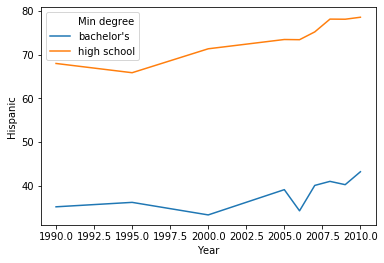

In [15]:
sns.lineplot(x="Year", y="Hispanic",hue="Min degree",data=hs_final)

##### Explanation
A line graph is chosen for the data visualization of this dataframe. For plotting data sets over a period of time, a line graph is more suitable as readers are able to clearly see the fluctuatation of the data set across the timeframe. Compared to a pie chart, it is hardly possible to acheive this. That said, if a bar chart is used instead, the bars of high school would overlap the bachelor's bar if not plotted in the correct fasion, not to say if there are more than two atttributes for the x-axis of the dataset. The graph would be very messy indeed.